In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [4]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
df['Annual Income (k$)'] = Scaler.fit_transform(df[['Annual Income (k$)']])
df['Spending Score (1-100)'] = Scaler.fit_transform(df[['Spending Score (1-100)']])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.738999,-0.434801
1,2,Male,21,-1.738999,1.195704
2,3,Female,20,-1.700830,-1.715913
3,4,Female,23,-1.700830,1.040418
4,5,Female,31,-1.662660,-0.395980
...,...,...,...,...,...
195,196,Female,35,2.268791,1.118061
196,197,Female,45,2.497807,-0.861839
197,198,Male,32,2.497807,0.923953
198,199,Male,32,2.917671,-1.250054


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

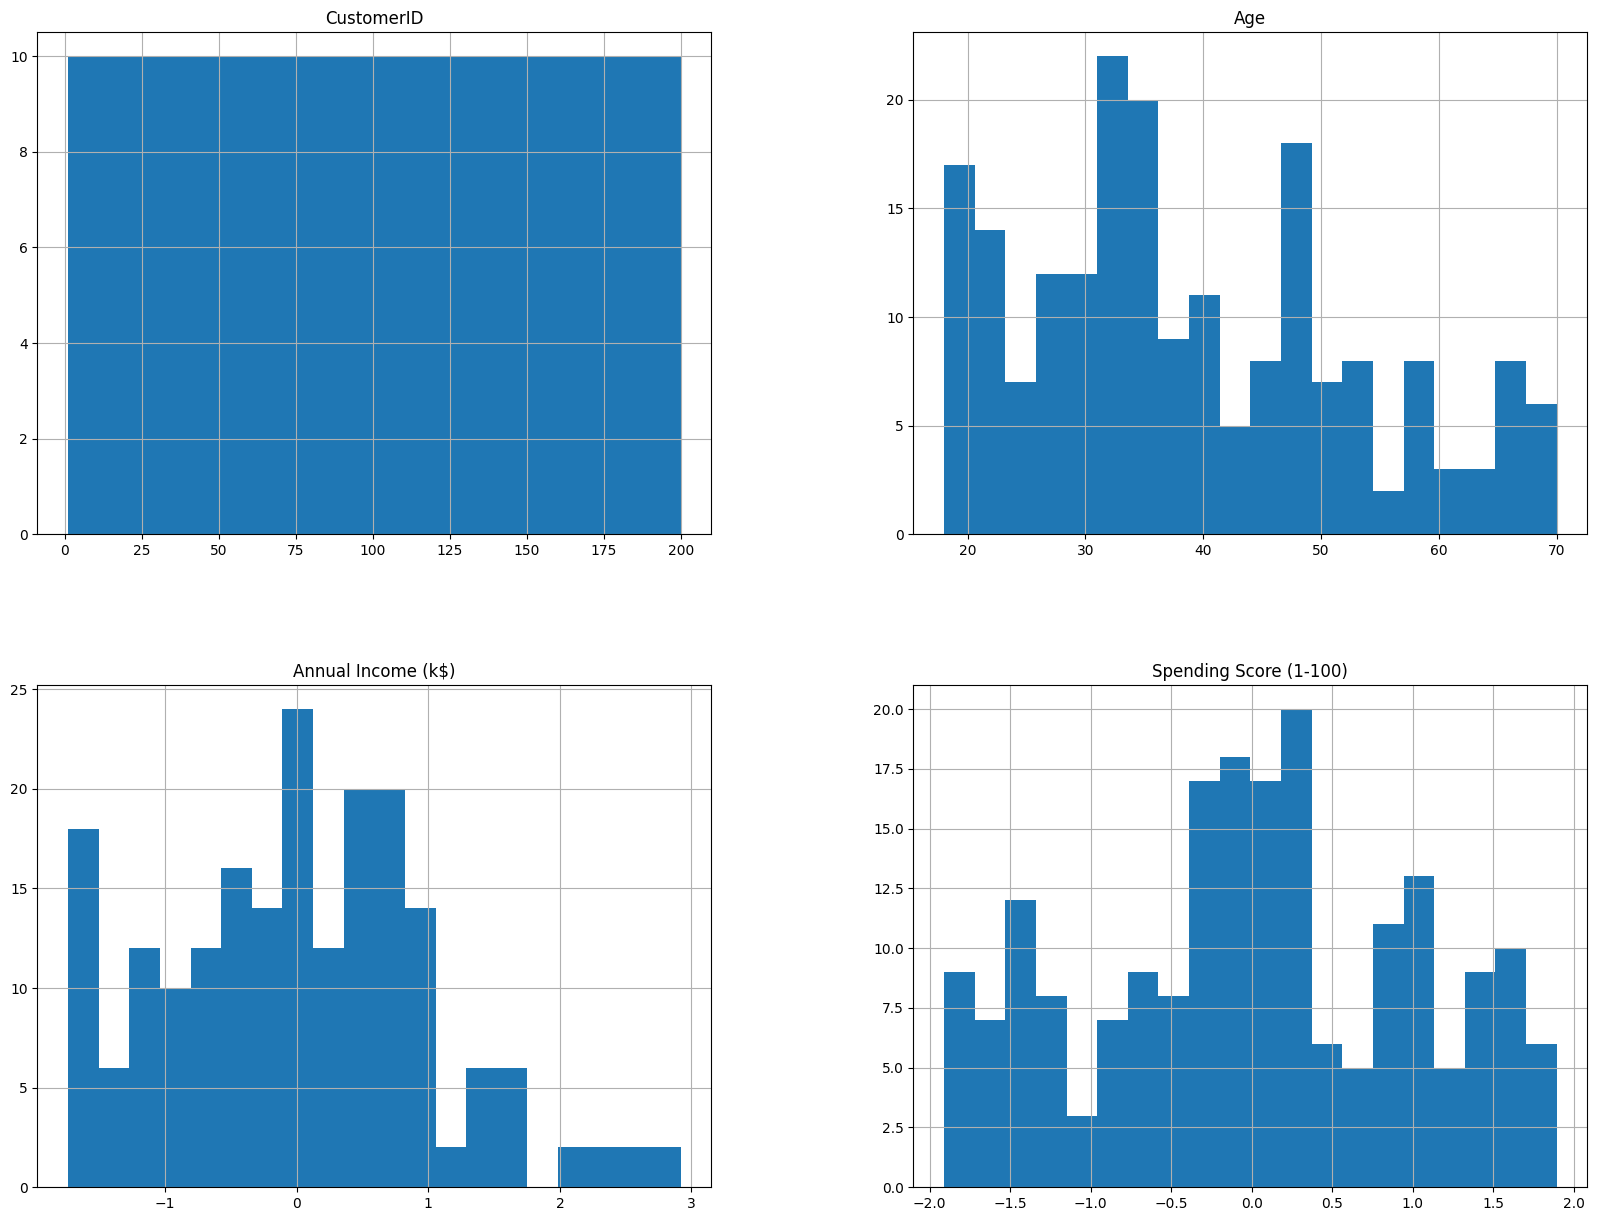

In [7]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(20,15))
plt.show()

In [8]:
training_set = df[['Annual Income (k$)','Spending Score (1-100)']]
training_set

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


<ipython-input-21-f6f2c41e6674>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set['Cluster'] = labels


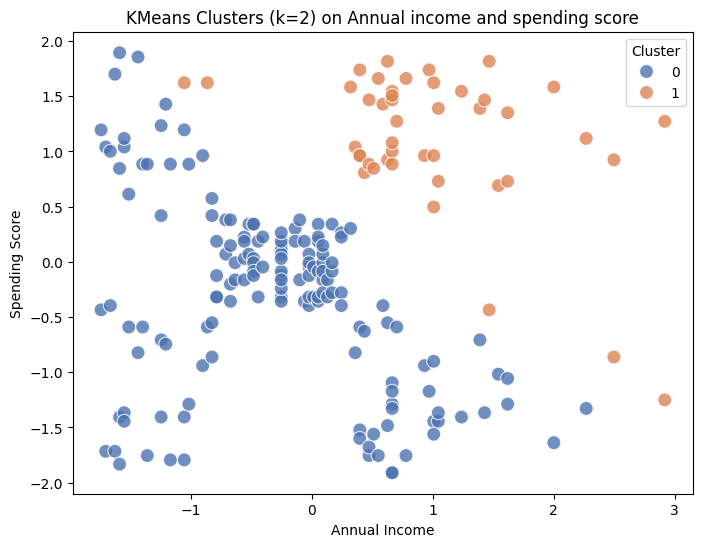

In [21]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k = 2
km = KMeans(n_clusters=k, random_state=42)
km.fit(training_set)

# Get the cluster labels
labels = km.labels_

# Add the labels to the dataframe for easier plotting
training_set['Cluster'] = labels

# Plot the data points with color by cluster label
plt.figure(figsize=(8, 6))
sns.scatterplot(data=training_set, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='deep', s=100, marker='o', alpha=0.8)
plt.title(f'KMeans Clusters (k={k}) on Annual income and spending score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title="Cluster")
plt.show()

In [17]:
training_set

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,1
197,2.497807,0.923953,1
198,2.917671,-1.250054,1


In [18]:
training_set2 = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
correlation = training_set2.corr()
correlation

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<ipython-input-26-bf7c4c009fb6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set2['Age'] = Scaler.fit_transform(training_set2[['Age']])
<ipython-input-26-bf7c4c009fb6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set2['Cluster'] = labels


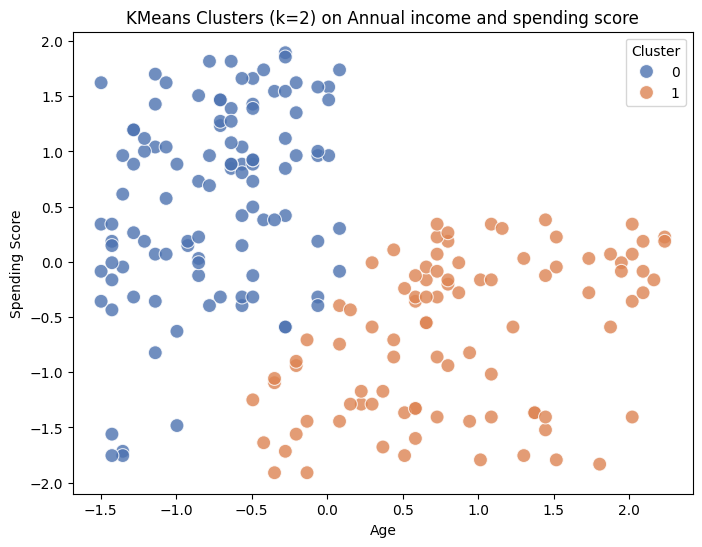

In [26]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k = 2
km = KMeans(n_clusters=k, random_state=40)
km.fit(training_set2)
training_set2['Age'] = Scaler.fit_transform(training_set2[['Age']])
# Get the cluster labels
labels = km.labels_

# Add the labels to the dataframe for easier plotting
training_set2['Cluster'] = labels

# Plot the data points with color by cluster label
plt.figure(figsize=(8, 6))
sns.scatterplot(data=training_set2, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='deep', s=100, marker='o', alpha=0.8)
plt.title(f'KMeans Clusters (k={k}) on Annual income and spending score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(title="Cluster")
plt.show()

In [29]:
display(training_set['Cluster'].value_counts())

,count
Cluster,
0,156
1,44


In [30]:
display(training_set2['Cluster'].value_counts())

,count
Cluster,
0,107
1,93
